## Hypothesis test of log returns for selected US stocks
In what follows below, we consider selected US stocks namely for Apple(AAPL), Microsoft (MSFT), Google (GOOGL), Tesla(TSLA) and Amazon(AMZN) using daily data over a 10 year period. Data is downloded from yfinance (available for free)

Below scripts imports the relevant libraries and download the data

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats

In [50]:
tickers = ["AAPL", "MSFT", "GOOGL", "TSLA", "AMZN"]
df = yf.download(tickers, period="10y", group_by = "ticker")

[*********************100%***********************]  5 of 5 completed



<br>

#### The first few lines of the dataframe is displayed below

<br>


In [51]:
df.head()

Ticker           TSLA                                                   AMZN  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2015-04-27  14.837333  15.916667  14.800000  15.436667  175089000  22.193001   
2015-04-28  15.650000  15.700000  15.202000  15.365333   91281000  21.925501   
2015-04-29  15.336667  15.664667  15.175333  15.496667   59041500  21.337500   
2015-04-30  15.359333  15.526000  15.011333  15.070000   58678500  21.355499   
2015-05-01  15.329333  15.451333  14.694000  15.068667   79225500  21.191000   

Ticker                                                  ...       MSFT  \
Price            High        Low      Close     Volume  ...       Open   
Date                                                    ...              
2015-04-27  22.349501  21.870501  21.927999  108618000  ...  40.762953   
2015-04-28  21.950001  21.402000  21.465500   82810000  ...  41.237638   
2015-04-29  21.712000  21.301500  21.468500   72434000  ...  42.048932   
2015-04-30  21.587500  20.962000  21.089001   72958000  ...  42.031678   
2015-05-01  21.282000  20.799999  21.143499   71316000  ...  41.928118   

Ticker                                                      AAPL             \
Price            High        Low      Close    Volume       Open       High   
Date                                                                          
2015-04-27  41.539720  40.754324  41.453411  59248200  29.548480  29.731610   
2015-04-28  42.471833  41.168594  42.428680  60730800  30.028641  30.046505   
2015-04-29  42.558145  41.859054  42.342377  47804600  29.068331  29.387688   
2015-04-30  42.756660  41.945369  41.979893  64725500  28.728868  28.728868   
2015-05-01  42.187039  41.772764  41.997162  38937300  28.161618  29.061630   

Ticker                                       
Price             Low      Close     Volume  
Date                                         
2015-04-27  29.289419  29.624411  387816800  
2015-04-28  28.936569  29.157661  475696000  
2015-04-29  28.652942  28.728872  253544400  
2015-04-30  27.822159  27.949455  332781600  
2015-05-01  27.982957  28.798101  234050400  

[5 rows x 25 columns]

In [52]:
df.shape

(2516, 25)

#### We consider only the 'Close' prices of the stocks

In [124]:

close_prices = df.xs("Close", axis=1, level=1)
close_prices.head()

Ticker,TSLA,AMZN,GOOGL,MSFT,AAPL
Date,,,,,
2015-04-27,15.436667,21.927999,28.171316,41.453411,29.624411
2015-04-28,15.365333,21.465500,28.084230,42.428680,29.157661
2015-04-29,15.496667,21.468500,27.935938,42.342377,28.728872
2015-04-30,15.070000,21.089001,27.307943,41.979893,27.949455
2015-05-01,15.068667,21.143499,27.426874,41.997162,28.798101


#### Date (index) is converted to datetime format in pandas

In [125]:
close_prices.index = pd.to_datetime(close_prices.index)
close_prices.index

DatetimeIndex(['2015-04-27', '2015-04-28', '2015-04-29', '2015-04-30',
               '2015-05-01', '2015-05-04', '2015-05-05', '2015-05-06',
               '2015-05-07', '2015-05-08',
               ...
               '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16',
               '2025-04-17', '2025-04-21', '2025-04-22', '2025-04-23',
               '2025-04-24', '2025-04-25'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

#### A plot of the daily cosing prices is displayed beow foe each stock

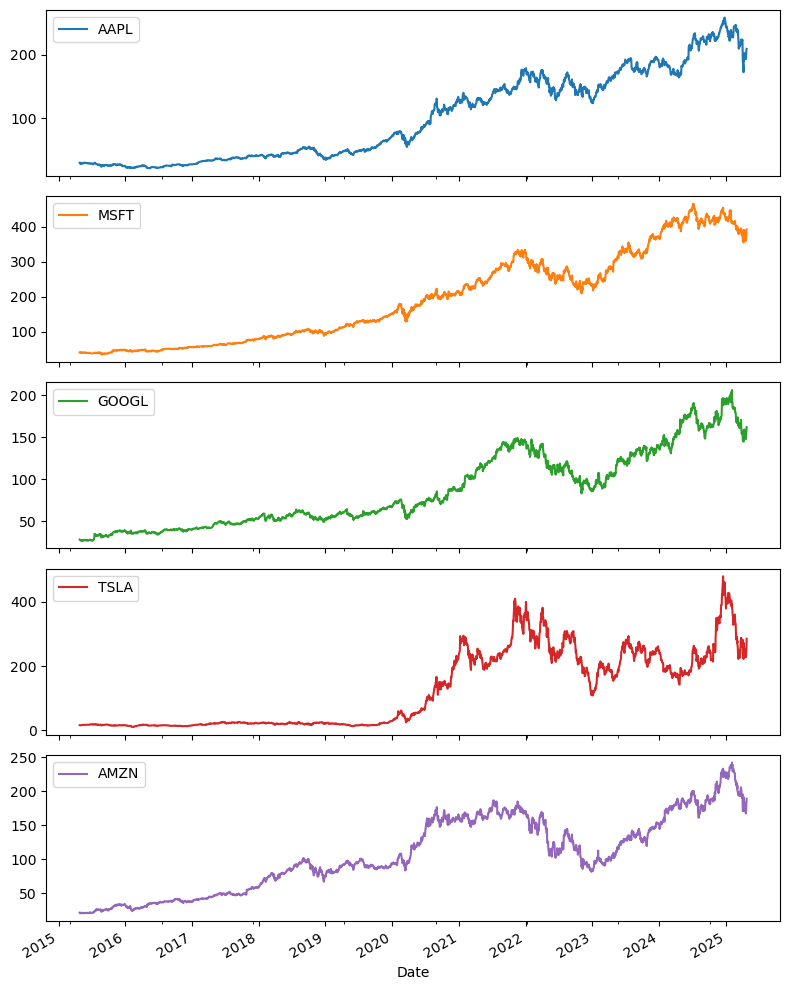

In [126]:
close_prices[tickers].plot(subplots=True, figsize=(8, 10), layout=(5, 1), sharex=True)
plt.tight_layout()
plt.show();

#### Log returns for each stock is computed

The **log return**  is defined as:
$$
r_t = \ln\left( \frac{P_t}{P_{t-1}} \right)
$$

where:
- $( r_t )$= log return at time $(t)$,
- $( P_t)$ = price at time $(t)$,
- $( P_{t-1})$ = price at time $( t-1)$.

In [127]:

from stock_functions import log_returns

df_return = log_returns(close_prices)
df_return.dropna(inplace = True)
df_return.head()

Ticker,TSLA,AMZN,GOOGL,MSFT,AAPL
Date,,,,,
2015-04-28,-0.463184,-2.131735,-0.309608,2.325439,-1.588100
2015-04-29,0.851112,0.013976,-0.529427,-0.203616,-1.481509
2015-04-30,-2.791897,-1.783514,-2.273633,-0.859764,-2.750491
2015-05-01,-0.008841,0.258089,0.434572,0.041128,2.991175
2015-05-04,1.962647,0.040198,0.304351,-0.866889,-0.194062


#### Below provides a summary statistics for the stock returns

In [128]:
df_return.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
TSLA,2515.0,0.115927,3.687445,-23.651789,-1.713363,0.125987,1.932109,20.449058
AMZN,2515.0,0.085643,2.063815,-15.139791,-0.889270,0.110893,1.145439,12.694892
GOOGL,2515.0,0.069545,1.822887,-12.368464,-0.772098,0.120190,0.973603,15.064528
MSFT,2515.0,0.089316,1.708821,-15.945319,-0.694621,0.095225,0.976479,13.292888
AAPL,2515.0,0.077737,1.845872,-13.770822,-0.748125,0.089665,1.010655,14.261745



#### We test the hypothesis that the stock returns is zero. 

The idea is to use a statistical test to ascertain whether the average stocks returns computed above are indeed different from zero or not

 This is given by:
<br>
$H_{0}: \beta = 0$

The formula for the t-test is as follows:

**T-Test**

$$
t_{\hat{\beta}}  = \frac{\hat{\beta} - \theta}{se(\hat{\beta})}
$$

Where $\hat{\beta}$ is the parameter to be tested, $\theta$ is the hypothesized value,  **Se** is the standard error of the parameter.
The test- statistic $t_{\hat{\beta}}$ has a t-distribution with 1 degree of freedom. <br>
The test measures how many standard deviations the parameter value ($\hat{\beta}$) is away from the hypothetized value.
We consider rejection of the null hypothesis at 5\% significance level. This implies that we are willing to mistakingly reject the null hypothesis when it is indeed true 5\% of the time.
<br>The test rejects the null hypothesis for significantly higher values of the test-statistic at 5\% level (95 percentile in the t-distribution will constitute our critical value).

#### Below is a function that computes the test-statistics and compares to the critical vaues based on the 5% significance level
<br>

In [129]:
def hypo_test(x):
    t_stat, p_value = stats.ttest_1samp(x, popmean=0)
    print("t-statistic:", t_stat.round(3))
    print("p-value:", p_value.round(3))
    
    if p_value < 0.05:
        print("Reject null hypothesis: The mean return for the stocks is significantly different from zero.")
    else:
        print("Fail to reject null hypothesis: The mean return for the stocks is not significantly different from zero.")
        

<br>

### Tesla Stocks
The hypothesis below suggests that  even though the average returns are positive, statsitically this is  likely due to random chance (at a 5% significance level)

In [130]:
hypo_test(df_return["TSLA"])

t-statistic: 1.577
p-value: 0.115
Fail to reject null hypothesis: The mean return for the stocks is not significantly different from zero.


<br>

### Amazon Stocks
The hypothesis below suggests that  the log retruns for Amazon stocks are statistically different from zero (at a 5% significance level). 

In [131]:
hypo_test(df_return["AMZN"])

t-statistic: 2.081
p-value: 0.038
Reject null hypothesis: The mean return for the stocks is significantly different from zero.


<br>

### Apple stocks
The hypothesis below suggests that  the log retruns for Apple stocks are statistically different from zero (at a 5% significance level).

In [132]:
hypo_test(df_return["AAPL"])

t-statistic: 2.112
p-value: 0.035
Reject null hypothesis: The mean return for the stocks is significantly different from zero.


<br>

### Microsoft stocks
The hypothesis below suggests that  the log retruns for Microsoft stocks are statistically different from zero (at a 5% significance level).

In [133]:
hypo_test(df_return["MSFT"])

t-statistic: 2.621
p-value: 0.009
Reject null hypothesis: The mean return for the stocks is significantly different from zero.


<br>

### Google Stocks
The hypothesis below suggests that  even though the average returns are positive, statsitically this is  likely due to random chance (at a 5% significance level)

In [134]:
hypo_test(df_return["GOOGL"])

t-statistic: 1.913
p-value: 0.056
Fail to reject null hypothesis: The mean return for the stocks is not significantly different from zero.


In [136]:
!jupyter nbconvert --to html Stocks.ipynb

[NbConvertApp] Converting notebook Stocks.ipynb to html
[NbConvertApp] Writing 748889 bytes to Stocks.html
